In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!ls *.jpg

ls: cannot access '*.jpg': No such file or directory


# Inspecting color-spaces

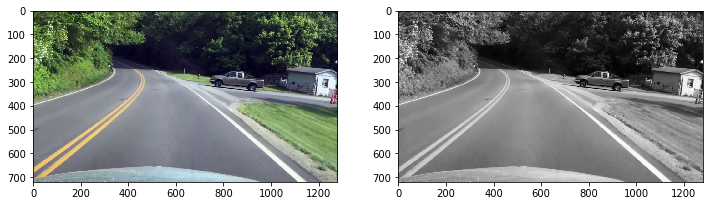

In [6]:
rgbFrame = plt.imread("./frame1031.jpg")
grayFrame = cv2.cvtColor(rgbFrame, cv2.COLOR_RGB2GRAY)

figure = plt.figure(figsize=((12, 12)))
axis = figure.add_subplot(121)
axis.imshow(rgbFrame)
axis = figure.add_subplot(122)
axis.imshow(grayFrame, cmap="gray")

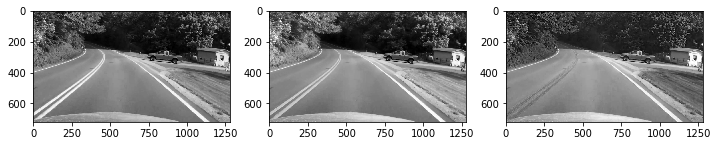

In [7]:
figure = plt.figure(figsize=((12, 12)))
for i in range(3):
    axis = figure.add_subplot(1, 3, i+1)
    axis.imshow(rgbFrame[:, :, i], cmap="gray")

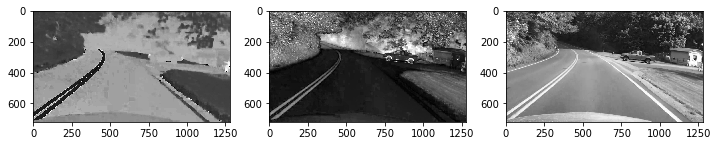

In [8]:
hsvFrame = cv2.cvtColor(rgbFrame, cv2.COLOR_RGB2HSV)
figure = plt.figure(figsize=((12, 12)))
for i in range(3):
    axis = figure.add_subplot(1, 3, i+1)
    axis.imshow(hsvFrame[:, :, i], cmap="gray")

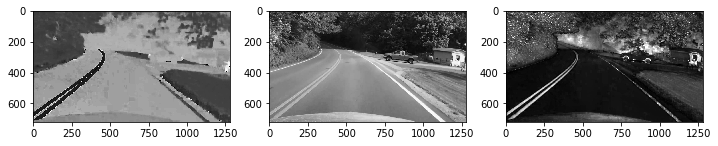

In [9]:
hslFrame = cv2.cvtColor(rgbFrame, cv2.COLOR_RGB2HLS)
figure = plt.figure(figsize=((12, 12)))
for i in range(3):
    axis = figure.add_subplot(1, 3, i+1)
    axis.imshow(hslFrame[:, :, i], cmap="gray")

# Selected Masks
- [x] red-channel in rgb-space
- [x] saturation-channel in hsv-space
- [x] saturation-channel in hsl-space


### Red Channel

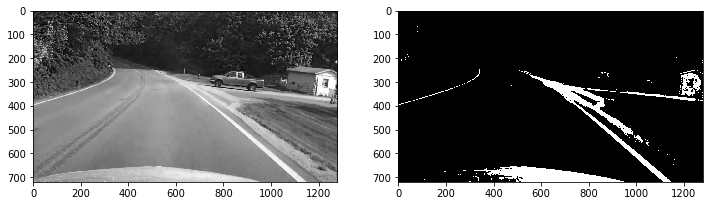

In [10]:
threshhold = 190
red = rgbFrame[:, :, 2]
redMask = np.zeros_like(red)
redMask[(red >threshhold) & (red < 255)] = 255
figure = plt.figure(figsize=((12, 12)))
axis = figure.add_subplot(1, 2, 1)
axis.imshow(red, cmap="gray")
axis = figure.add_subplot(1, 2, 2)
axis.imshow(redMask, cmap="gray")

### saturation in hsv

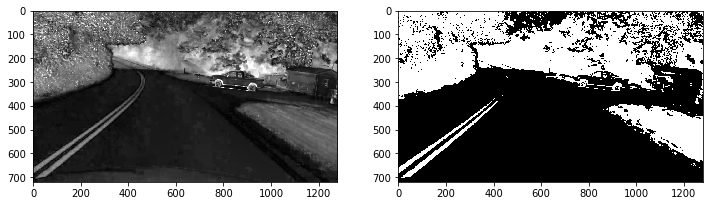

In [11]:
threshhold = 80
saturation = hsvFrame[:, :, 1]
hsvSatMask = np.zeros_like(saturation)
hsvSatMask[(saturation >threshhold) & (red < 255)] = 255
figure = plt.figure(figsize=((12, 12)))
axis = figure.add_subplot(1, 2, 1)
axis.imshow(saturation, cmap="gray")
axis = figure.add_subplot(1, 2, 2)
axis.imshow(hsvSatMask, cmap="gray")

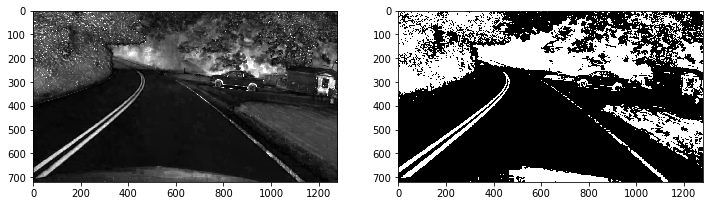

In [12]:
threshhold = 65
saturation = hslFrame[:, :, 2]
hslSatMask = np.zeros_like(saturation)
hslSatMask[(saturation >threshhold) & (red < 255)] = 255
figure = plt.figure(figsize=((12, 12)))
axis = figure.add_subplot(1, 2, 1)
axis.imshow(saturation, cmap="gray")
axis = figure.add_subplot(1, 2, 2)
axis.imshow(hslSatMask, cmap="gray")

# Target output

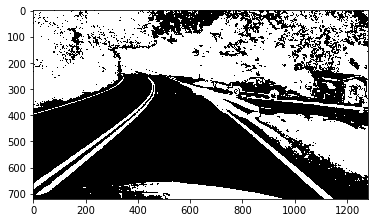

In [13]:
outMask = cv2.bitwise_or(redMask, hsvSatMask)
outMask = cv2.bitwise_or(outMask, hslSatMask)
plt.imshow(outMask, "gray")

# Dataset Test

In [14]:
from glob import glob
glob("./*.jpg")

['./frame246.jpg',
 './frame1031.jpg',
 './frame949.jpg',
 './frame116.jpg',
 './frame620.jpg',
 './frame741.jpg',
 './frame547.jpg',
 './frame1295.jpg']

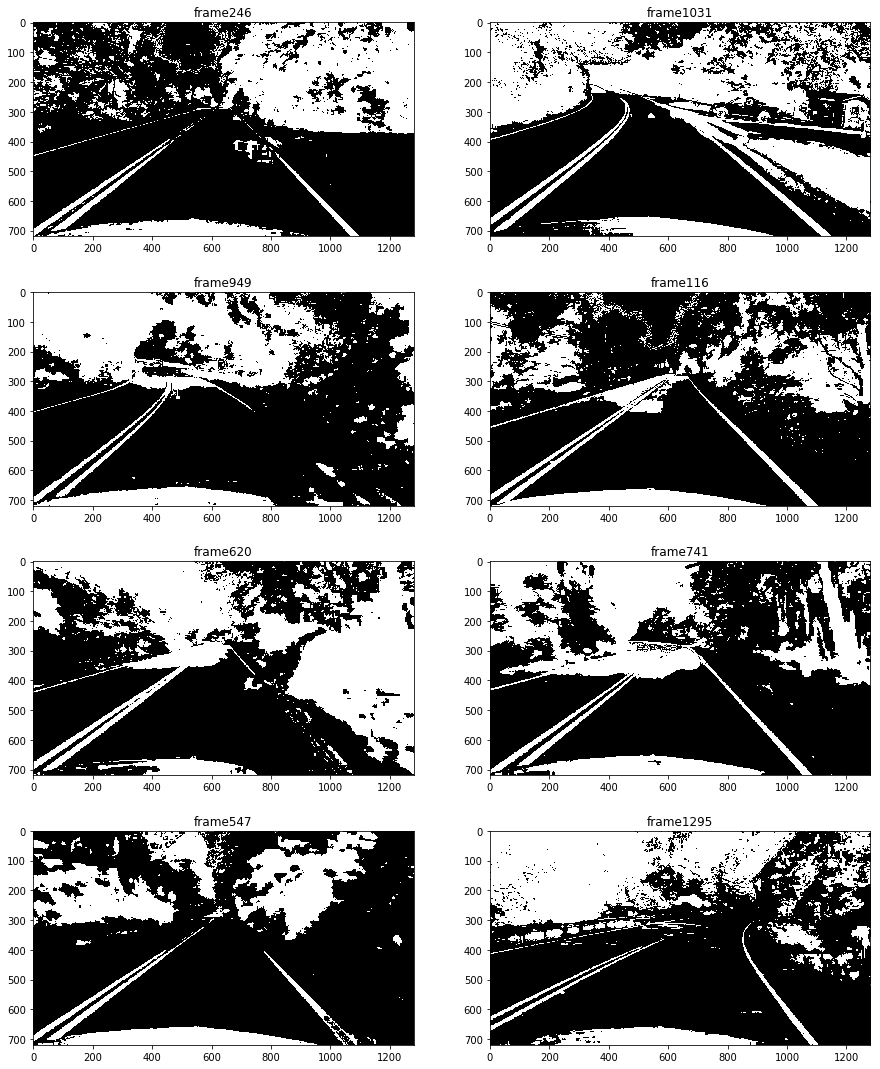

In [15]:
fig = plt.figure(figsize=(15, 19))
imagesPathes = glob("./*.jpg")
numOfImgs = len(imagesPathes)

for i, imgPath in enumerate(imagesPathes):
    rgbFrame = plt.imread(imgPath)
    hsvFrame = cv2.cvtColor(rgbFrame, cv2.COLOR_RGB2HSV)
    hslFrame = cv2.cvtColor(rgbFrame, cv2.COLOR_RGB2HLS)
    # ............... red channel mask .................
    threshhold = 185
    red = rgbFrame[:, :, 2]
    redMask = np.zeros_like(red)
    redMask[(red >threshhold) & (red < 255)] = 255
    # ............... hsv channel mask .................
    threshhold = 85
    saturation = hsvFrame[:, :, 1]
    hsvSatMask = np.zeros_like(saturation)
    hsvSatMask[(saturation >threshhold) & (red < 255)] = 255
    # ............... hsl channel mask .................
    threshhold = 55
    saturation = hslFrame[:, :, 2]
    hslSatMask = np.zeros_like(saturation)
    hslSatMask[(saturation >threshhold) & (red < 255)] = 255
    
    outMask = cv2.bitwise_or(redMask, hsvSatMask)
    outMask = cv2.bitwise_or(outMask, hslSatMask)
    axis = fig.add_subplot(numOfImgs//2, numOfImgs//4, i+1)
    axis.imshow(outMask, "gray")
    axis.set_title(imgPath[2:-4])

# color segmentation in hsv-space red-channel 

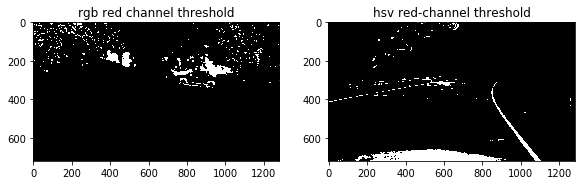

In [16]:
# nred = np.zeros_like(rgbFrame)

# nred[:, :, 0] = red
# hsv = cv2.cvtColor(nred, cv2.COLOR_RGB2HSV)
# white color selection only
rgbFrame = plt.imread("frame1031.jpg")
whiteHSL = cv2.cvtColor(rgbFrame, cv2.COLOR_RGB2HLS)
wmask = cv2.inRange(whiteHSL, np.array([0, 0, 180]), np.array([180, 30, 255]))
kernel = np.ones((5, 5), "uint8")
wmask = cv2.dilate(wmask, kernel, iterations=1)

fig = plt.figure(figsize=(15, 15))
axis = fig.add_subplot(1, 3, 1)
axis.set_title("rgb red channel threshold")
axis.imshow(wmask, "gray")
axis = fig.add_subplot(1, 3, 2)
axis.set_title("hsv red-channel threshold")
axis.imshow(redMask, "gray")

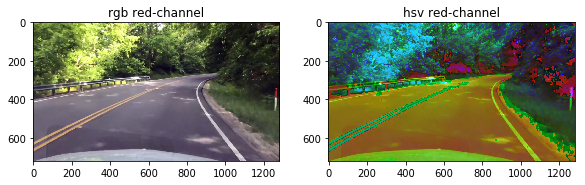

In [24]:
# creating 3d-image for in range function of red channel
# nred = np.zeros_like(rgbFrame)
# # red = rgbFrame[:, :, 2]
# nred[:, :, 0] = red
# rgbFrame = plt.imread("frame1031.jpg")
hsv = cv2.cvtColor(rgbFrame, cv2.COLOR_RGB2HLS)

fig = plt.figure(figsize=(15, 15))
axis = fig.add_subplot(1, 3, 1)
axis.set_title("rgb red-channel")
axis.imshow(rgbFrame, "gray")
axis = fig.add_subplot(1, 3, 2)
axis.set_title("hsv red-channel")
axis.imshow(hsv)

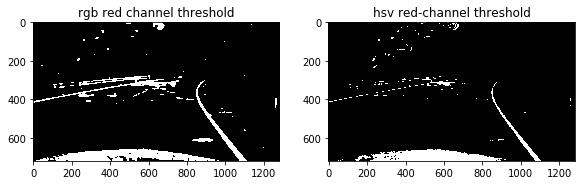

In [25]:
# nred = np.zeros_like(rgbFrame)

# nred[:, :, 0] = red
# hsv = cv2.cvtColor(nred, cv2.COLOR_RGB2HSV)
# white color selection only
# rgbFrame = plt.imread("frame620.jpg")
whiteHSV = cv2.cvtColor(rgbFrame, cv2.COLOR_RGB2HSV)
wmask = cv2.inRange(whiteHSV, np.array([0, 0, 180]), np.array([180, 30, 255]))
kernel = np.ones((5, 5), "uint8")
wmask = cv2.dilate(wmask, kernel, iterations=1)

fig = plt.figure(figsize=(15, 15))
axis = fig.add_subplot(1, 3, 1)
axis.set_title("rgb red channel threshold")
axis.imshow(wmask, "gray")
axis = fig.add_subplot(1, 3, 2)
axis.set_title("hsv red-channel threshold")
axis.imshow(redMask, "gray")

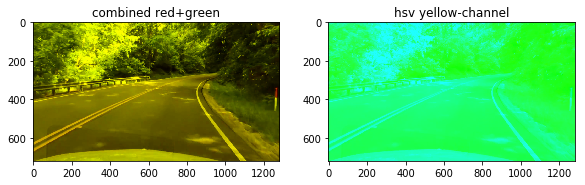

In [26]:
# creating 3d-image for in range function of red channel
# rgbFrame = plt.imread("frame1031.jpg")
nyellow = np.zeros_like(rgbFrame)
# red = rgbFrame[:, :, 0]
# green = rgbFrame[:, :, 1]

# nyellow[:, :, 0] = red
# nyellow[:, :, 1] = green
nyellow[:, :, :2] = rgbFrame[:, :, :2]
hsv = cv2.cvtColor(nyellow, cv2.COLOR_RGB2HSV)
fig = plt.figure(figsize=(15, 15))
nyellow[:, :, :2] = rgbFrame[:, :, :2]

axis = fig.add_subplot(1, 3, 2)
axis.set_title("combined red+green")
axis.imshow(nyellow)

axis = fig.add_subplot(1, 3, 3)
axis.set_title("hsv yellow-channel")
axis.imshow(hsv)

<Figure size 1080x1080 with 0 Axes>

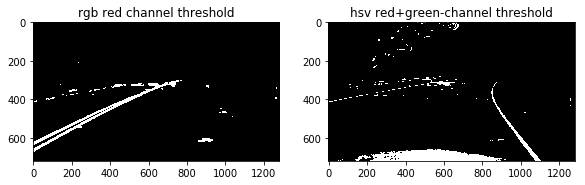

In [27]:
# creating 3d-image for in range function of red channel
# rgbFrame = plt.imread("frame246.jpg")
nyellow = np.zeros_like(rgbFrame)
# red = rgbFrame[:, :, 0]
# green = rgbFrame[:, :, 1]
nyellow[:, :, :2] = rgbFrame[:, :, :2]
# nyellow[:, :, 0] = red
# nyellow[:, :, 1] = green
yellowHSV = cv2.cvtColor(nyellow, cv2.COLOR_RGB2HSV)
fig = plt.figure(figsize=(15, 15))


ymask = cv2.inRange(yellowHSV, np.array([0, 255, 180]), np.array([27, 255, 255]))
kernel = np.ones((5, 5), "uint8")
ymask = cv2.dilate(ymask, kernel, iterations=1)

fig = plt.figure(figsize=(15, 15))
axis = fig.add_subplot(1, 3, 1)
axis.set_title("rgb red channel threshold")
axis.imshow(ymask, "gray")
axis = fig.add_subplot(1, 3, 2)
axis.set_title("hsv red+green-channel threshold")
axis.imshow(redMask, "gray")

In [28]:
# [0, 0, 220]), np.array([180, 15, 255]   # white
# [0, 255, 220]), np.array([28, 255, 255]  # yellow

# ------------------------

# rgbHLS = cv2.cvtColor(rgbFrame, cv2.COLOR_RGB2HLS)
# whiteMask = cv2.inRange(rgbHLS, np.array([0, 150, 75]), np.array([180, 255, 255]))

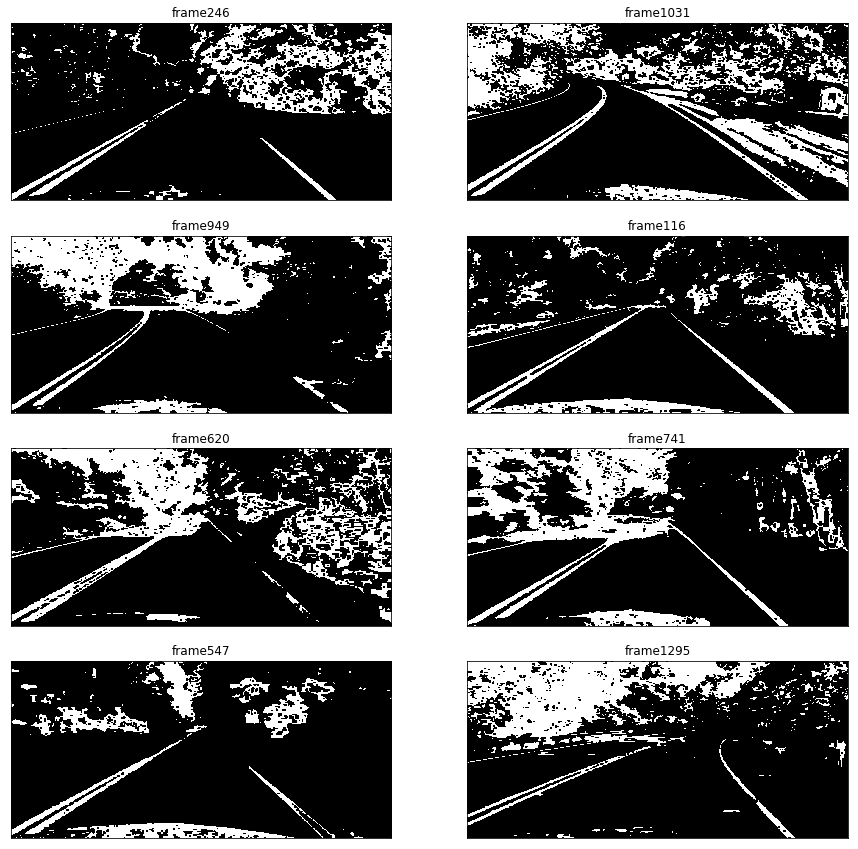

In [57]:
from glob import glob


fig = plt.figure(figsize=(15, 15))
fig.tight_layout()
imagesPathes = glob("./*.jpg")
numOfImgs = len(imagesPathes)
kernel = np.ones((5, 5), "uint8")

for i, imgPath in enumerate(imagesPathes):
    rgbFrame = plt.imread(imgPath)
#     rgFrame[:, :, :2] = rgbFrame[:, :, :2]
    # .................. white filter ..................
    h1, s1, v1 = cv2.split(cv2.cvtColor(rgbFrame, cv2.COLOR_RGB2HSV))
    h2, l2, s2 = cv2.split(cv2.cvtColor(rgbFrame, cv2.COLOR_RGB2HLS))
    mask = cv2.bitwise_or(s1, s2)
    mask = cv2.bitwise_or(mask, rgbFrame[:, :, 0])
    outMask = np.zeros_like(outMask)
    outMask[(mask > 191) & (mask < 255)] = 255
#     whiteMask = cv2.inRange(rgbHSV, np.array([0, 0, 175]), np.array([180, 30, 255]))
    # .................. yellow filter ..................
#     rgHSV = cv2.cvtColor(rgFrame, cv2.COLOR_RGB2HSV)
#     yellowMask = cv2.inRange(rgHSV, np.array([0, 255, 175]), np.array([27, 255, 255]))
#     # .................. combined filters ..................
#     outMask = cv2.bitwise_or(whiteMask, yellowMask)
    outMask = cv2.dilate(outMask, kernel, iterations=1)
    outMask = cv2.erode(outMask, kernel, iterations=1)

#     outMask = rgbFrame
    axis = fig.add_subplot(numOfImgs//2, numOfImgs//4, i+1)
    axis.set_xticks([])
    axis.set_yticks([])
    axis.imshow(outMask, "gray", aspect="auto")
    axis.set_title(imgPath[2:-4])

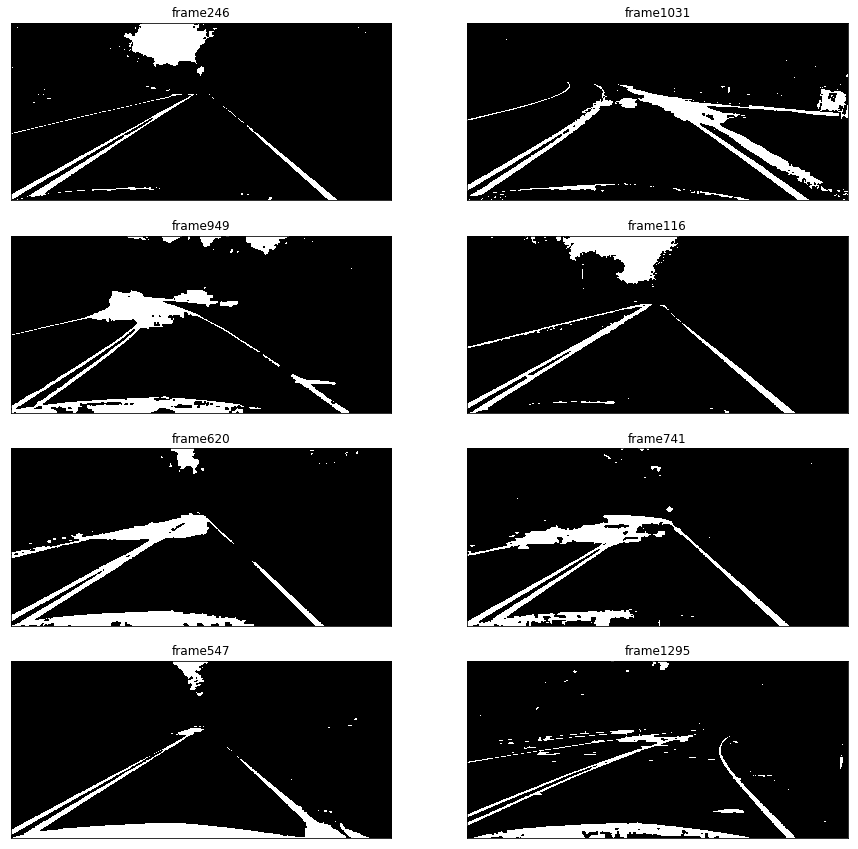

In [47]:
from glob import glob


fig = plt.figure(figsize=(15, 15))
fig.tight_layout()
imagesPathes = glob("./*.jpg")
numOfImgs = len(imagesPathes)
kernel = np.ones((5, 5), "uint8")

for i, imgPath in enumerate(imagesPathes):
    bgrFrame = cv2.imread(imgPath)
    rgbFrame = cv2.cvtColor(bgrFrame, cv2.COLOR_BGR2RGB)
    rgFrame = np.zeros_like(rgbFrame)
    rgFrame[:, :, :2] = rgbFrame[:, :, :2]
    # .................. white filter ..................
    rgbHSV = cv2.cvtColor(rgbFrame, cv2.COLOR_RGB2HSV)
    whiteMask = cv2.inRange(rgbHSV, np.array([0, 0, 175]), np.array([180, 30, 255]))
    # .................. yellow filter ..................
    rgHSV = cv2.cvtColor(rgFrame, cv2.COLOR_RGB2HSV)
    yellowMask = cv2.inRange(rgHSV, np.array([0, 255, 175]), np.array([27, 255, 255]))
    # .................. combined filters ..................
    outMask = cv2.bitwise_or(whiteMask, yellowMask)
    outMask = cv2.dilate(outMask, kernel, iterations=1)
    outMask = cv2.erode(outMask, kernel, iterations=1)

#     outMask = rgbFrame
    axis = fig.add_subplot(numOfImgs//2, numOfImgs//4, i+1)
    axis.set_xticks([])
    axis.set_yticks([])
    axis.imshow(outMask, "gray", aspect="auto")
    axis.set_title(imgPath[2:-4])

In [37]:
rgbFrame[:, :, -2::-1].shape

(720, 1280, 2)

In [40]:
x = [1, 2, 3]
x[-2::-1]

[2, 1]